#**Project 2 : Stock Data**

----
This project revolves around the comprehensive analysis of stock market data. It begins by cleaning and preprocessing the data, removing irrelevant entries such as weekends and federal holidays. The analysis includes the calculation and visualization of key indicators like Exponential Moving Averages (EMA), Simple Moving Averages (SMA), Moving Average Convergence Divergence (MACD), Relative Strength Index (RSI), Bollinger Bands, and Average Directional Index (ADX). Additionally, it employs a Linear Regression model to predict stock closing prices using open, high, and low values. The project culminates in a multi-subplot visualization, offering insights into various aspects of stock market behavior and prediction accuracy.

----


Tasks:

1. Ask user for start date and end date between that period calculate. 12-period EMA and 26-period EMA are two moving averages. Calculate them and plot These two with Close price in a line chart

2. Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart

   a.  compare SMA 12 EMA 12 and CLOSE

   b. compare SMA 26 EMA 26 and CLOSE

3.  Calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD

4. Calculate RSI, Bollinger bands and ADX using the notebook for our own data.

5. Create a subplot with all indicators.

----

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
path = '/content/Stock_data.csv'

In [237]:
df_raw = pd.read_csv(path)
df_raw.shape

(12890, 6)

In [239]:
df_raw.head(5)

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


----
#**Data Cleaning and Preprocessing**

----

In [241]:
df_raw.isna().sum()

Gmt time    0
Volume      0
Open        0
High        0
Low         0
Close       0
dtype: int64

There are no missing values in the data.

In [243]:
df_raw.dtypes

Gmt time     object
Volume      float64
Open        float64
High        float64
Low         float64
Close       float64
dtype: object

Given that the datatype for 'Gmt time' is currently in an object type, it should be converted to the Pandas datetime format to facilitate the analysis process.

In [245]:
df_final = df_raw

In [247]:
df_final['Gmt time'] = pd.to_datetime(df_raw['Gmt time'], format ='%d.%m.%Y %H:%M:%S.%f')

In [249]:
df_final.head(10)

,Gmt time,Volume,Open,High,Low,Close
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205
5,2012-12-12 20:00:00,12511.1400,1.238205,1.239455,1.237810,1.238975
6,2012-12-13 00:00:00,13014.5603,1.238950,1.239780,1.237800,1.239665
7,2012-12-13 04:00:00,13104.6699,1.239685,1.240975,1.239360,1.239555
8,2012-12-13 08:00:00,28629.3398,1.239555,1.241140,1.237085,1.238270
9,2012-12-13 12:00:00,32854.7207,1.238275,1.240950,1.237255,1.240745


We can check if there is any inconsistency in the data. Since stock market don't operate on Saturdays and Sundays, we can check if there is any data input for those days. For this, we can use the 'dt.day_name' function in pandas.

We will create a new column with the equivalent day of the week and see if there are any Saturday and Sundays and their occurences.

In [250]:
df_final['Day_of_Week'] = pd.to_datetime(df_final['Gmt time']).dt.day_name()

In [251]:
df_final.shape

(12890, 7)

In [252]:
weekends = df_final[(df_final['Day_of_Week'] == 'Sunday') | (df_final['Day_of_Week'] == 'Saturday')].index

Since there are 416 records for Saturdays and Sundays out of a total of 12,890, which represents only 3.2% of the entire dataset, removing these rows will not significantly impact the data. Therefore, it's acceptable to proceed with the deletion of rows corresponding to Saturdays and Sundays.

In [253]:
df_final = df_final.drop(weekends)

In [254]:
df_final.head(3)

,Gmt time,Volume,Open,High,Low,Close,Day_of_Week
0,2012-12-12 00:00:00,11011.3902,1.23492,1.23589,1.233830,1.235200,Wednesday
1,2012-12-12 04:00:00,13271.5599,1.23521,1.23551,1.233860,1.234340,Wednesday
2,2012-12-12 08:00:00,26716.2305,1.23435,1.23637,1.233305,1.234905,Wednesday


In [255]:
df_final.tail(3)

,Gmt time,Volume,Open,High,Low,Close,Day_of_Week
12887,2020-12-11 12:00:00,49848.50,1.60993,1.611365,1.606575,1.606745,Friday
12888,2020-12-11 16:00:00,23094.53,1.60672,1.609540,1.605880,1.607315,Friday
12889,2020-12-11 20:00:00,5512.42,1.60731,1.608910,1.606925,1.607785,Friday


We can check if there any dates associated with federal holidays and remove them. For this, Create a list(federal_holidays) with the associated federal holiday dates.

In [256]:
import pandas as pd

start_year = 2012     # Since the dataframe contains the data from 2012 to 2020
end_year = 2020

holidays_without_years = {
    "New Year's Day": '-01-01',
    "Memorial Day": '-05-29',
    "Independence Day": '-07-04',
    "Labor Day": '-09-04',
    "Christmas Day": '-12-25'
}

federal_holidays = []

# Loop through the range of years and add holidays for each year
for year in range(start_year, end_year + 1):
    for holiday, date_format in holidays_without_years.items():
        holiday_date = f'{year}{date_format}'
        federal_holidays.append(pd.to_datetime(holiday_date))   # list will contain all dates that were federal holidays

print(type(federal_holidays[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


 Selects and creates a new DataFrame (df_federal_holidays) that includes only the rows from the original DataFrame (df_final) where the 'Gmt time' column matches any of the dates listed in the federal_holidays list.

In [257]:
df_federal_holidays = df_final[df_final['Gmt time'].isin(federal_holidays)]

In [258]:
print(df_federal_holidays.shape)
df_federal_holidays.head(4)

(28, 7)


,Gmt time,Volume,Open,High,Low,Close,Day_of_Week
56,2012-12-25,6525.6800,1.271535,1.272270,1.270310,1.270830,Tuesday
87,2013-01-01,134.5200,1.268880,1.268925,1.268835,1.268880,Tuesday
740,2013-05-29,29389.8804,1.341890,1.346205,1.341480,1.344270,Wednesday
901,2013-07-04,33979.4707,1.428290,1.432105,1.423780,1.426275,Thursday


Indeed, considering that there are 28 rows corresponding to dates with federal holidays, it might be a prudent approach to remove these rows for a more accurate and focused analysis. This will help ensure that the presence of federal holidays does not skew the analysis of the data.

In [259]:
indices = df_federal_holidays.index
df_final = df_final.drop(indices)

In [260]:
df_final.shape

(12446, 7)

We can now go forward and remove the 'Day_of_Week' column.

In [261]:
df = df_final.drop('Day_of_Week', axis = 1)

In [262]:
print(df.shape)
df.head(5)

(12446, 6)


,Gmt time,Volume,Open,High,Low,Close
0,2012-12-12 00:00:00,11011.3902,1.23492,1.235890,1.233830,1.235200
1,2012-12-12 04:00:00,13271.5599,1.23521,1.235510,1.233860,1.234340
2,2012-12-12 08:00:00,26716.2305,1.23435,1.236370,1.233305,1.234905
3,2012-12-12 12:00:00,28430.1602,1.23491,1.237285,1.234850,1.236810
4,2012-12-12 16:00:00,33124.1904,1.23680,1.238700,1.236285,1.238205


"df" represents the clean and constructed DataFrame, consisting of 12,446 rows and 6 columns. We can proceed to perform further data analysis on these specific days.

----
**TASK1. Ask user for start date and end date between that period calculate. 12-period EMA and 26-period EMA are two moving averages. Calculate them and plot These two with Close price in a line chart.**

----

In [263]:
# Take the input from the user

#start_date = input("Enter the start date in the format:[YYYY-MM-DD]: ")
#end_date = input("Enter the end date in the format:[YYYY-MM-DD]")

'HARDCODED : FOR TESTING ONLY'

start_date = '2013-10-10'
end_date = '2014-10-10'

Creating a new DataFrame to store the output exclusively for the date period specified by the user.

In [264]:
df = df_final[(df_final['Gmt time'] >= start_date) & (df_final['Gmt time'] <= end_date)]

df                    # -> Calculate EMA for this DATAFRAME only that contains the rows specific to user input

# Reset the index -> Indexing for loop is difficult without this.
first_index = df.index[0]
df.reset_index(drop = True, inplace = True)

Calculating the 12-period Exponential Moving Average (EMA_12) and the 26-period Exponential Moving Average (EMA_26) using the 'ewm' method from panda library.

In [265]:
df['EMA12'] = df['Close'].ewm(span=12).mean()     # span = 12 for 12-period EMA
df['EMA26'] = df['Close'].ewm(span=26).mean()     # span = 26 for 26-period EMA

<ipython-input-265-587aeef5e4cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12).mean()     # span = 12 for 12-period EMA
<ipython-input-265-587aeef5e4cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA26'] = df['Close'].ewm(span=26).mean()     # span = 26 for 26-period EMA


Only for demonstration purpose:

Using for loop to manually calcualte EMA for each time period.

In [266]:
# # Initializing the two empty columns ['EMA_12', 'EMA_26']

# df.loc[0,'EMA_12'] = 0
# df.loc[0, 'EMA_26'] =  0
# df

In [267]:
# # Calculate 12-period EMA and adding to the df
# # multiplier_12 = (Smoothing / 1+ 12) -> Smoothing = 2

# multiplier_12 = (2/(1+12))

# for i in range(len(df)):
#   if i == 0:                                  # If its the first row
#     df.loc[i, 'EMA_12'] = df.loc[i, 'Close']  #
#   else:
#     EMA12_lastrow = df.loc[i-1, 'EMA_12']
#     value_today_12 = df.loc[i, 'Close']
#     ema_12_value = (value_today_12 * multiplier_12) + EMA12_lastrow * (1-(multiplier_12))
#     df.loc[i, 'EMA_12'] = ema_12_value
# #df

In [268]:
# # Calculate 26-period EMA
# # multiplier_26 = (Smoothing / 1+ 26) -> Smoothing = 2

# multiplier_26 = (2/(1+26))

# for i in range(len(df)):
#   if i == 0:
#     df.loc[i, 'EMA_26'] = df.loc[i, 'Close']
#   else:
#     EMA26_lastrow = df.loc[i - 1, 'EMA_26']
#     value_today_26 = df.loc[i, 'Close']
#     ema_26_value = (value_today_26 * multiplier_26) + EMA26_lastrow * (1-(multiplier_26))
#     df.loc[i, 'EMA_26'] = ema_26_value
# #df

In [269]:
df.head(4)

,Gmt time,Volume,Open,High,Low,Close,Day_of_Week,EMA12,EMA26
0,2013-10-10 00:00:00,25147.1704,1.430685,1.436550,1.427170,1.434585,Thursday,1.434585,1.434585
1,2013-10-10 04:00:00,21117.4298,1.434590,1.436930,1.431630,1.431785,Thursday,1.433068,1.433131
2,2013-10-10 08:00:00,23338.8906,1.431805,1.435245,1.431505,1.434675,Thursday,1.433695,1.433686
3,2013-10-10 12:00:00,36718.4101,1.434680,1.435950,1.428660,1.429970,Thursday,1.432519,1.432647


In [270]:
df.tail(4)

,Gmt time,Volume,Open,High,Low,Close,Day_of_Week,EMA12,EMA26
1551,2014-10-09 12:00:00,44280.2803,1.440355,1.446465,1.437725,1.444960,Thursday,1.440655,1.440756
1552,2014-10-09 16:00:00,27649.6998,1.444995,1.447095,1.443415,1.445425,Thursday,1.441389,1.441102
1553,2014-10-09 20:00:00,12899.9899,1.445420,1.448810,1.444330,1.447760,Thursday,1.442369,1.441595
1554,2014-10-10 00:00:00,20954.3601,1.447765,1.451735,1.447375,1.447815,Friday,1.443207,1.442056


----
**Data Visualization: Representing data in the Line Chart**

----

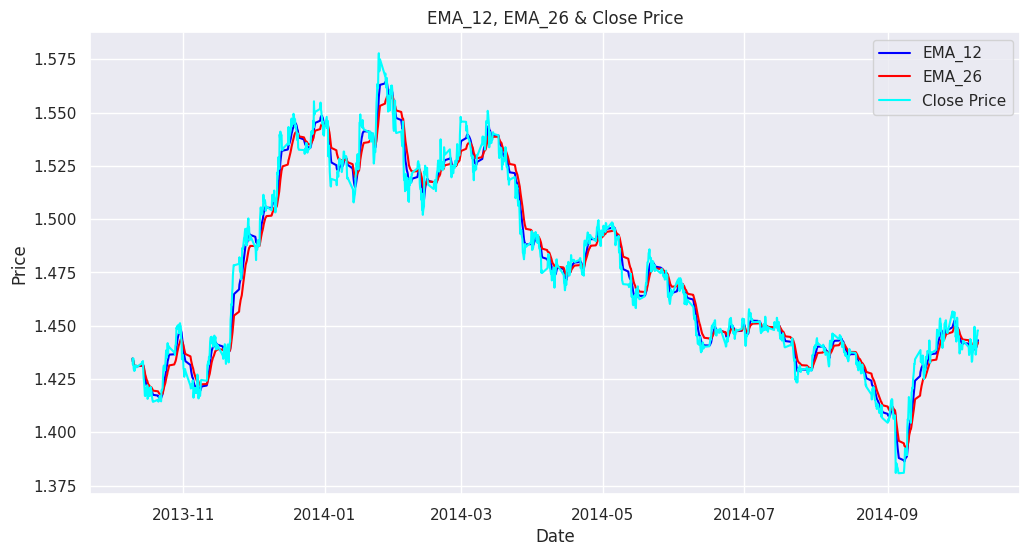

In [271]:
import seaborn as sns

sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='EMA12', data=df, label='EMA_12', color='blue')
sns.lineplot(x='Gmt time', y='EMA26', data=df, label='EMA_26', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA_12, EMA_26 & Close Price')

plt.legend()
plt.grid()
plt.show()


----
**Task 2: Request user input for a start date and end date within the specified period, then calculate the 12-period Simple Moving Average (SMA) and 26-period SMA.**

Calculate these moving averages and plot them along with the Close price on a line chart.

*   Compare the 12-period Simple Moving Average (SMA_12), 12-period Exponential Moving Average (EMA_12), and Close price.

*   Compare the 26-period Simple Moving Average (SMA_26), 26-period Exponential Moving Average (EMA_26), and Close price.

----

Calculating SMA12 and SMA26 and appending them to the DataFrame using panda method rolling().mean()

In [ ]:
df['SMA12'] = df['Close'].rolling(12).mean()      # rolling(12) for 12-period SMA
df['SMA26'] = df['Close'].rolling(26).mean()      # rolling(26) for 26-period SMA

The resulting dataset will contain null values because the first 11 elements for both SMA 12 and SMA 26 won't have sufficient data for calculation, resulting in null values. However, for the purpose of creating a plot diagram, these null values will have minimal impact since they occur only at the beginning. Thus, we will not remove these null values and leave them as they are.

----
**Data Visualization with SMA12 vs SMA 26 vs Close**

----

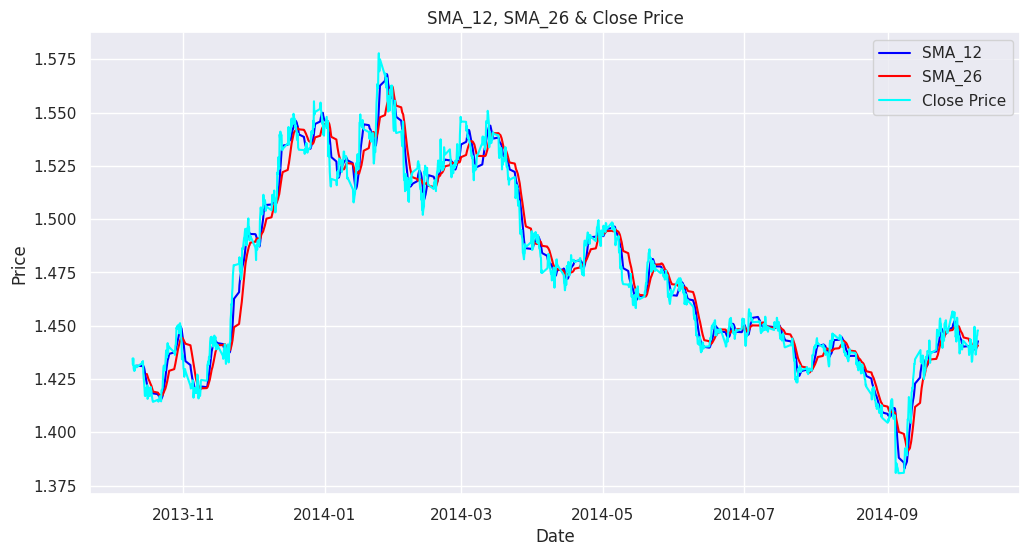

In [273]:
sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='SMA12', data=df, label='SMA_12', color='blue')
sns.lineplot(x='Gmt time', y='SMA26', data=df, label='SMA_26', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SMA_12, SMA_26 & Close Price')

plt.legend()
plt.grid()
plt.show()

----

**Data Visualization: Comparing SMA 12, EMA 12, and Close Prices**

----

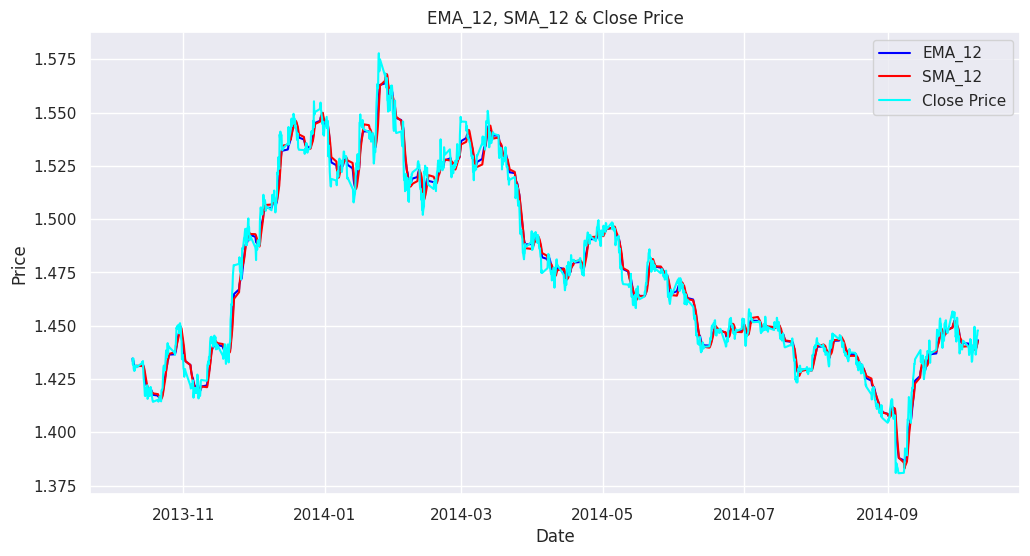

In [274]:

sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='EMA12', data=df, label='EMA_12', color='blue')
sns.lineplot(x='Gmt time', y='SMA12', data=df, label='SMA_12', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA_12, SMA_12 & Close Price')

plt.legend()
plt.grid()
plt.show()


----
**Data Visualization: Comparing SMA 26, EMA 26, and Close Prices.**


----

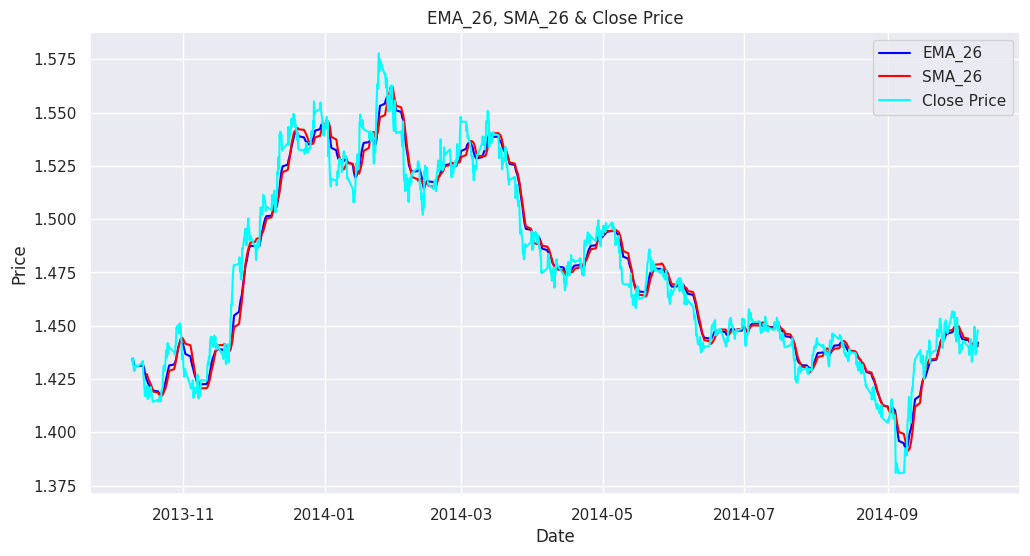

In [275]:
sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='EMA26', data=df, label='EMA_26', color='blue')
sns.lineplot(x='Gmt time', y='SMA26', data=df, label='SMA_26', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA_26, SMA_26 & Close Price')

plt.legend()
plt.grid()
plt.show()


----
**Task 3. Calculate the MACD between EMA 26 and EMA 12, and plot a line chart displaying EMA 26, EMA 12, and the MACD."**

 ----

Approach: Make another column in dataframe ith values of MACD -> EMA26- EMA12

In [276]:
df = df.reset_index(drop=True)      # Reset the column first
df['MACD'] = df['EMA26'] - df['EMA12']

In [277]:
df.head(4)

,Gmt time,Volume,Open,High,Low,Close,Day_of_Week,EMA12,EMA26,SMA12,SMA26,MACD
0,2013-10-10 00:00:00,25147.1704,1.430685,1.436550,1.427170,1.434585,Thursday,1.434585,1.434585,NaN,NaN,0.000000
1,2013-10-10 04:00:00,21117.4298,1.434590,1.436930,1.431630,1.431785,Thursday,1.433068,1.433131,NaN,NaN,0.000063
2,2013-10-10 08:00:00,23338.8906,1.431805,1.435245,1.431505,1.434675,Thursday,1.433695,1.433686,NaN,NaN,-0.000010
3,2013-10-10 12:00:00,36718.4101,1.434680,1.435950,1.428660,1.429970,Thursday,1.432519,1.432647,NaN,NaN,0.000128


----
**Data Visualization: Comparing EMA 26, EMA 12, and MACD.**

----

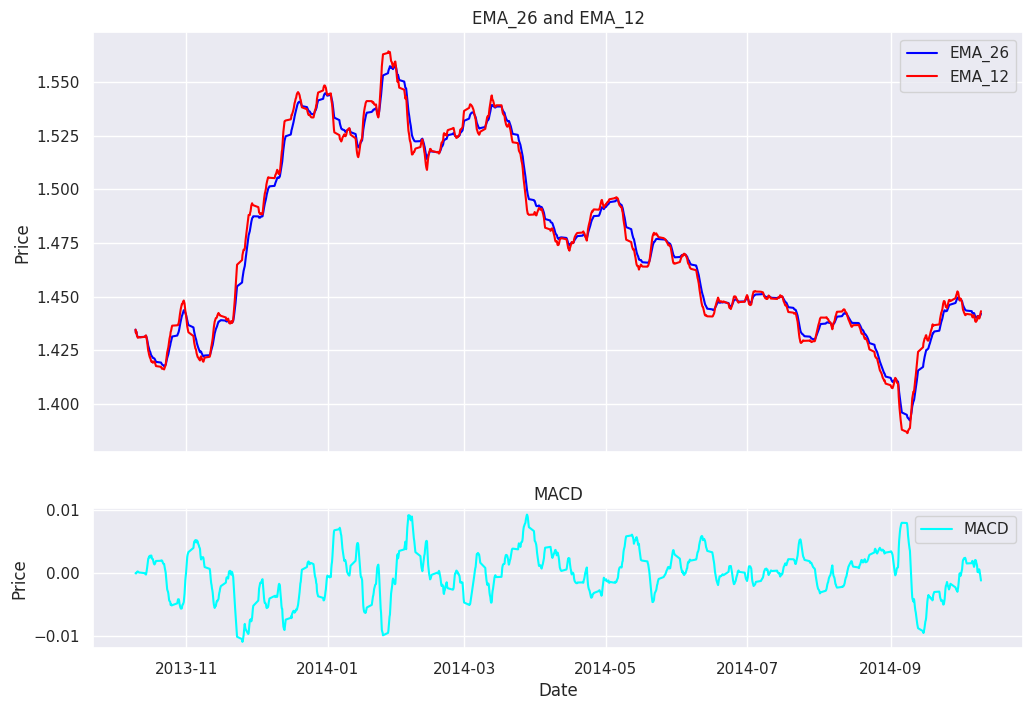

In [278]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw = {'height_ratios': [3,1]})

# Plot EMA_26 and EMA_12 on the first subplot (ax1)
sns.lineplot(x='Gmt time', y='EMA26', data=df, label='EMA_26', color='blue', ax=ax1)
sns.lineplot(x='Gmt time', y='EMA12', data=df, label='EMA_12', color='red', ax=ax1)
ax1.set_ylabel('Price')
ax1.set_title('EMA_26 and EMA_12')

ax1.legend()
ax1.grid()


# Plot MACD on the second subplot (ax2)
sns.lineplot(x='Gmt time', y='MACD', data=df, label='MACD', color='cyan', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.set_title('MACD')

ax2.legend()
ax2.grid()

plt.show()


----
**Task 4. Calculate and Plot the following indicators:**

*   RSI (Relative Strength Index)
*   Bollinger Bands
*   ADX (Average Directional Index)

----

To calculate these indicators—RSI, Bollinger Bands, and ADX—it's helpful to import the 'pandas-ta' library to simplify the calculation process.

In [ ]:
pip install pandas-ta

In [280]:
import pandas_ta as ta

In [ ]:
df.ta.indicators()

In [ ]:
help(ta.rsi)

**Relative Strength Index (RSI) Indicator**

The new dataframe(df_rsi) will contain the columns necessary for calculations of rsi.

In [283]:
df_new = df[['Gmt time','Open', 'High','Low', 'Close']]
df_rsi = df_new
df_rsi

,Gmt time,Open,High,Low,Close
0,2013-10-10 00:00:00,1.430685,1.436550,1.427170,1.434585
1,2013-10-10 04:00:00,1.434590,1.436930,1.431630,1.431785
2,2013-10-10 08:00:00,1.431805,1.435245,1.431505,1.434675
3,2013-10-10 12:00:00,1.434680,1.435950,1.428660,1.429970
4,2013-10-10 16:00:00,1.429975,1.431300,1.428675,1.428905
...,...,...,...,...,...
1550,2014-10-09 08:00:00,1.437830,1.440445,1.436270,1.440345
1551,2014-10-09 12:00:00,1.440355,1.446465,1.437725,1.444960
1552,2014-10-09 16:00:00,1.444995,1.447095,1.443415,1.445425
1553,2014-10-09 20:00:00,1.445420,1.448810,1.444330,1.447760


Using the 'rsi' method of 'ta' object, the relative strength indicator can be calculated.

In [ ]:
df_rsi['RSI_12'] = ta.rsi(df_rsi['Close'], timeperiod = 12)       # timeperiod = 12 for 12-Period RSI
df_rsi['RSI_26'] = ta.rsi(df_rsi['Close'], timeperiod = 26)       # timeperiod = 26 for 26-Period RSI

In [285]:
df_rsi.tail(5)

,Gmt time,Open,High,Low,Close,RSI_12,RSI_26
1550,2014-10-09 08:00:00,1.437830,1.440445,1.436270,1.440345,49.834346,49.834346
1551,2014-10-09 12:00:00,1.440355,1.446465,1.437725,1.444960,55.045091,55.045091
1552,2014-10-09 16:00:00,1.444995,1.447095,1.443415,1.445425,55.546127,55.546127
1553,2014-10-09 20:00:00,1.445420,1.448810,1.444330,1.447760,58.073113,58.073113
1554,2014-10-10 00:00:00,1.447765,1.451735,1.447375,1.447815,58.133483,58.133483


----
**Data Visualization: 12-Period RSI, 26-Period RSI & Close Price for Comparison**

----

Subplots generated using Seaborn-Matplotlib : RSI_12, RSI_26, and Close prices, sharing a date axis useful for tracking RSI and price trends.

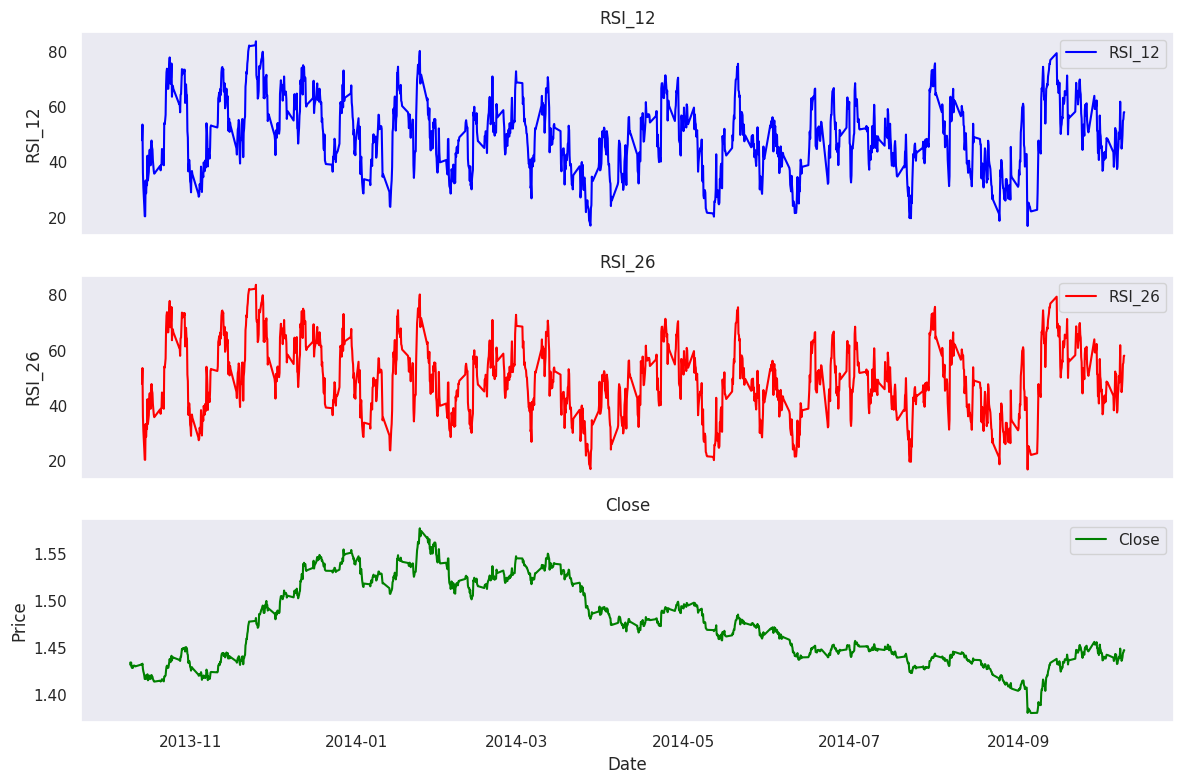

In [286]:
# Create subplots using Seaborn and Matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 8), sharex=True)

# Plot RSI_12 on the first subplot
ax1.set_ylabel('RSI_12')
sns.lineplot(x='Gmt time', y = 'RSI_12', ax=ax1, data = df_rsi, label='RSI_12', color='blue')
ax1.set_title('RSI_12')

# Plot RSI_26 on the second subplot
ax2.set_ylabel('RSI_26')
sns.lineplot(x='Gmt time', y = 'RSI_26', ax=ax2, data = df_rsi, label='RSI_26', color='red')
ax2.set_title('RSI_26')

# Plot Close on the third subplot
ax3.set_xlabel('Date')
ax3.set_ylabel('Price')
sns.lineplot(x='Gmt time', y = 'Close', ax=ax3, data = df_rsi, label='Close', color='green')
ax3.set_title('Close')

plt.tight_layout()
plt.show()


**Average Directional Index**

In [ ]:
help(ta.adx)

In [288]:
df_adx = df_new

In [289]:
df_adx.tail(5)

,Gmt time,Open,High,Low,Close,RSI_12,RSI_26
1550,2014-10-09 08:00:00,1.437830,1.440445,1.436270,1.440345,49.834346,49.834346
1551,2014-10-09 12:00:00,1.440355,1.446465,1.437725,1.444960,55.045091,55.045091
1552,2014-10-09 16:00:00,1.444995,1.447095,1.443415,1.445425,55.546127,55.546127
1553,2014-10-09 20:00:00,1.445420,1.448810,1.444330,1.447760,58.073113,58.073113
1554,2014-10-10 00:00:00,1.447765,1.451735,1.447375,1.447815,58.133483,58.133483


Due to the structure of the 'adx' method in the pandas-ta library, the 'Average Directional Index' (ADX) must be calculated as a separate DataFrame. To address this, ADX is computed for each time period, and then it is appended to the main DataFrame 'df_adx' using the 'join' method.

In [290]:
adx12 = ta.adx(df_adx['High'], df_adx['Low'], df_adx['Close'], length=12)         # length = 12 for 12-Period ADX
df_adx = df_adx.join(adx12)

adx26 = ta.adx(df_adx['High'], df_adx['Low'], df_adx['Close'], length = 26)       # length = 26 for 26-Period ADX
df_adx = df_adx.join(adx26)

The pertinent columns are filtered and stored in a new DataFrame, 'df_adxfinal,' to enhance clarity and comprehension.

In [291]:
df_adxfinal = df_adx[['Gmt time','Close','ADX_12','ADX_26']]

In [292]:
df_adxfinal.tail(5)

,Gmt time,Close,ADX_12,ADX_26
1550,2014-10-09 08:00:00,1.440345,22.601894,10.401426
1551,2014-10-09 12:00:00,1.444960,25.501647,11.261322
1552,2014-10-09 16:00:00,1.445425,28.238724,12.115433
1553,2014-10-09 20:00:00,1.447760,30.962806,13.010916
1554,2014-10-10 00:00:00,1.447815,33.796477,13.993535


----
**Data Visualization: 12-period ADX, 26-Period ADX**

----

Subplots generated using Seaborn-Matplotlib : 12-period ADX, 26-Period ADX

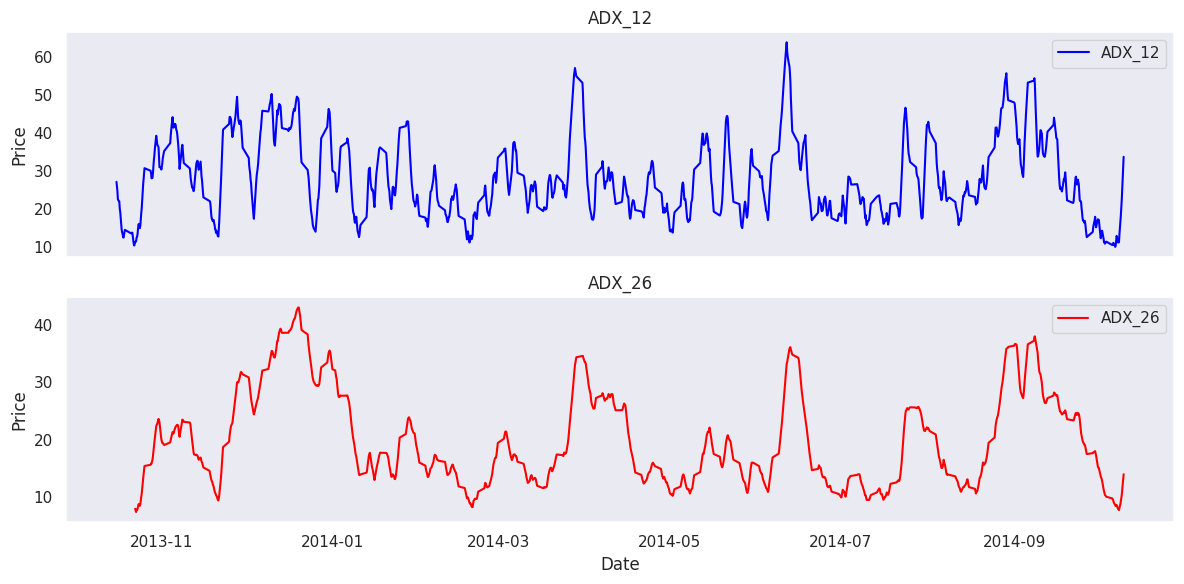

In [293]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.set_ylabel('Price')
sns.lineplot(x='Gmt time', y = 'ADX_12', ax=ax1, data = df_adxfinal, label='ADX_12', color='blue')
ax1.set_title('ADX_12')

ax2.set_ylabel('Price')
sns.lineplot(x='Gmt time', y = 'ADX_26', ax=ax2, data = df_adxfinal, label='ADX_26', color='red')
ax2.set_title('ADX_26')

ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()


**Bollinger Bands**

In [ ]:
help(ta.bbands)

The new dataframe 'df_bb' will only contain the column necessary for calculating bollinger bands.

In [295]:
df_bb = df[['Gmt time','Close']]

In [296]:
df_bb.head(5)

,Gmt time,Close
0,2013-10-10 00:00:00,1.434585
1,2013-10-10 04:00:00,1.431785
2,2013-10-10 08:00:00,1.434675
3,2013-10-10 12:00:00,1.429970
4,2013-10-10 16:00:00,1.428905


Using the 'bbands' method of pandas-ta library, bollinger bands can be calculated for each time period.

The output dataframe of each bollinger band is appended to the main dataframe using 'join' method.

In [297]:
bbands_12 = ta.bbands(df_bb['Close'], length = 12)      # length = 12 for 12-Period Bollinger Bands
df_bb = df_bb.join(bbands_12)

bbands_26 = ta.bbands(df_bb['Close'], length = 26)      # length = 26, for 26-Period Bollinger Bands
df_bb = df_bb.join(bbands_26)

In [298]:
df_bb.columns

Index(['Gmt time', 'Close', 'BBL_12_2.0', 'BBM_12_2.0', 'BBU_12_2.0',
       'BBB_12_2.0', 'BBP_12_2.0', 'BBL_26_2.0', 'BBM_26_2.0', 'BBU_26_2.0',
       'BBB_26_2.0', 'BBP_26_2.0'],
      dtype='object')

Since the bbands method will output lower, mid, upper, bandwidth, and percent columns, we can filter the necessary columns 'lower','mid' and 'upper' and drop the unnecessary columns.

In [299]:
df_bb = df_bb.drop(['BBB_12_2.0','BBP_12_2.0','BBB_26_2.0','BBP_26_2.0'], axis = 1)

The columns have been renamed to improve clarity and comprehension.

In [300]:
new_column_names_12 = {'BBL_12_2.0': 'lower_12', 'BBM_12_2.0': 'mid_12', 'BBU_12_2.0': 'upper_12'}
new_column_names_26 = {'BBL_26_2.0': 'lower_26', 'BBM_26_2.0': 'mid_26', 'BBU_26_2.0': 'upper_26'}

In [301]:
df_bb.rename(columns=new_column_names_12, inplace=True)
df_bb.rename(columns=new_column_names_26, inplace=True)

----
**Data Visualization for Bollinger bands**

Plot1 : Comparison of Close vs Upper12 vs Mid12 vs Low12


Plot2 : Comparison of Close vs Upper26 vs Mid26 vs Low12

----

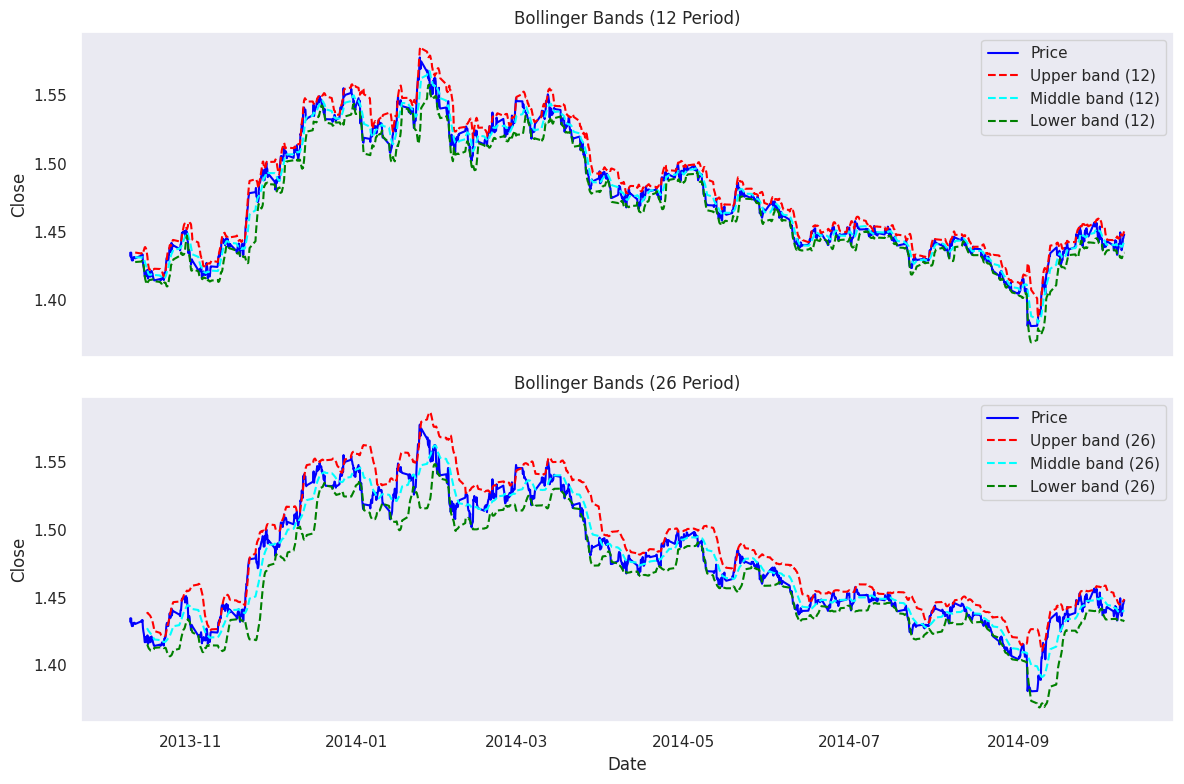

In [302]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8), sharex=True)

sns.set(style="darkgrid")

sns.lineplot(data=df_bb, x='Gmt time', y='Close', ax=ax1, label='Price', color='blue')
sns.lineplot(data=df_bb, x='Gmt time', y='upper_12', ax=ax1, label='Upper band (12)', color='red', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='mid_12', ax=ax1, label='Middle band (12)', color='cyan', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='lower_12', ax=ax1, label='Lower band (12)', color='green', linestyle='--')
ax1.set_title('Bollinger Bands (12 Period)')
ax1.legend()

sns.lineplot(data=df_bb, x='Gmt time', y='Close', ax=ax2, label='Price', color='blue')
sns.lineplot(data=df_bb, x='Gmt time', y='upper_26', ax=ax2, label='Upper band (26)', color='red', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='mid_26', ax=ax2, label='Middle band (26)', color='cyan', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='lower_26', ax=ax2, label='Lower band (26)', color='green', linestyle='--')
ax2.set_title('Bollinger Bands (26 Period)')
ax2.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


----
**Data Visualization: Comparing Close, High, and Low Prices**

----

In [303]:
df.head(5)

,Gmt time,Volume,Open,High,Low,Close,Day_of_Week,EMA12,EMA26,SMA12,SMA26,MACD
0,2013-10-10 00:00:00,25147.1704,1.430685,1.436550,1.427170,1.434585,Thursday,1.434585,1.434585,NaN,NaN,0.000000
1,2013-10-10 04:00:00,21117.4298,1.434590,1.436930,1.431630,1.431785,Thursday,1.433068,1.433131,NaN,NaN,0.000063
2,2013-10-10 08:00:00,23338.8906,1.431805,1.435245,1.431505,1.434675,Thursday,1.433695,1.433686,NaN,NaN,-0.000010
3,2013-10-10 12:00:00,36718.4101,1.434680,1.435950,1.428660,1.429970,Thursday,1.432519,1.432647,NaN,NaN,0.000128
4,2013-10-10 16:00:00,17603.4700,1.429975,1.431300,1.428675,1.428905,Thursday,1.431537,1.431779,NaN,NaN,0.000242


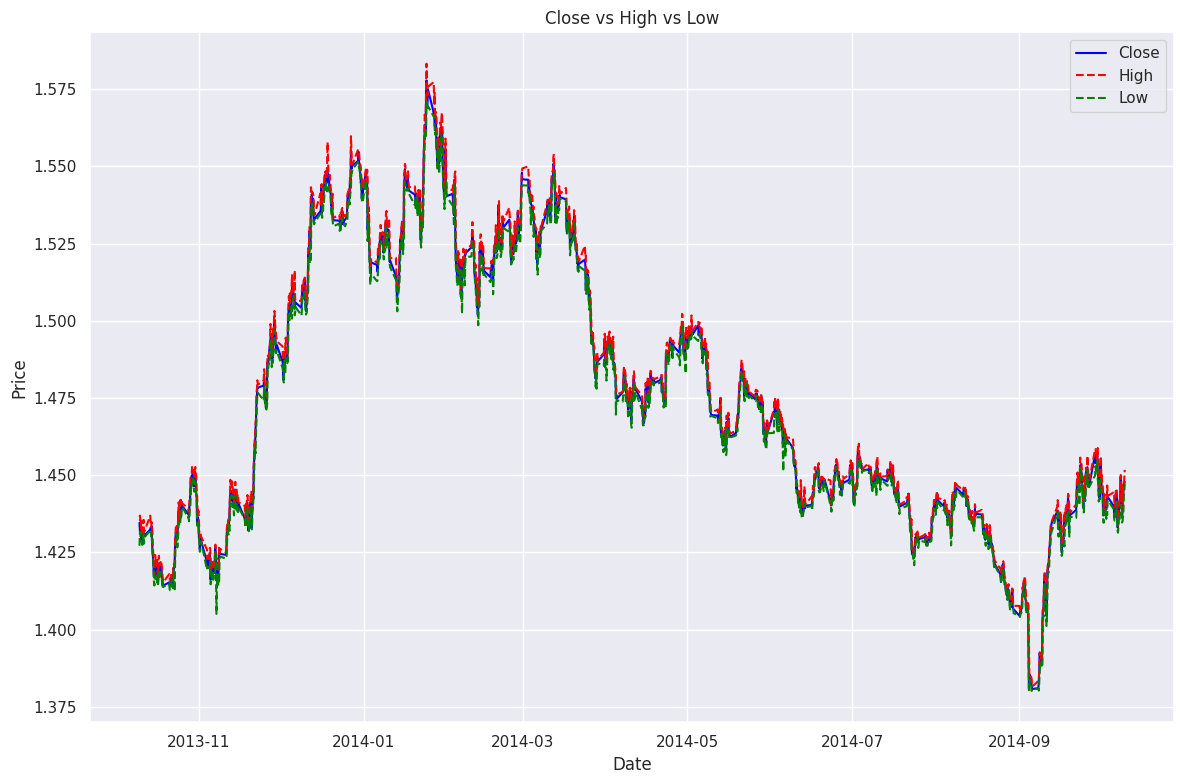

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(style="darkgrid")

sns.lineplot(data=df, x='Gmt time', y='Close', label='Close', color='blue')
sns.lineplot(data=df, x='Gmt time', y='High', label='High', color='red', linestyle='--')
sns.lineplot(data=df, x='Gmt time', y='Low', label='Low', color='green', linestyle='--')

plt.title('Close vs High vs Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

---
**Subplot with Indicators:**

1. SMA 12 vs close

2. SMA 26 vs close

3. EMA 12 vs close

4. EMA 26 vs close

5. MACD

6. RSI 12 vs close

7. RSI 26 vs close

8. Bollinger bands all three vs close

9. ADX

10. Close vs High vs Low

----

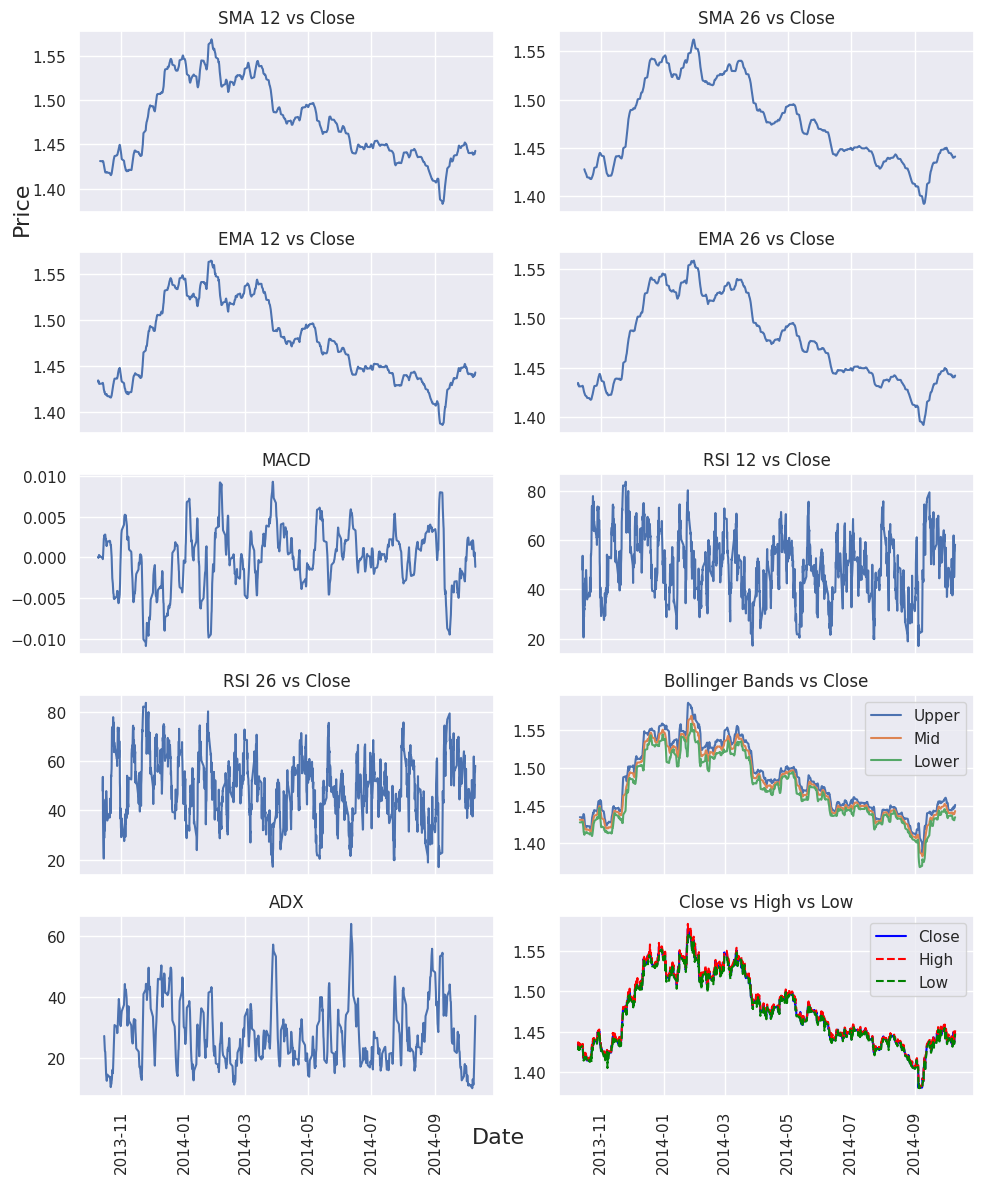

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5 x 2 Subplot Grid
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharex=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# 1. SMA 12 vs Close
sns.lineplot(data=df, x='Gmt time', y='SMA12', ax=axes[0, 0])
axes[0, 0].set_title('SMA 12 vs Close')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

# 2. SMA 26 vs Close
sns.lineplot(data=df, x='Gmt time', y='SMA26', ax=axes[0, 1])
axes[0, 1].set_title('SMA 26 vs Close')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# 3. EMA 12 vs Close
sns.lineplot(data=df, x='Gmt time', y='EMA12', ax=axes[1, 0])
axes[1, 0].set_title('EMA 12 vs Close')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# 4. EMA 26 vs Close
sns.lineplot(data=df, x='Gmt time', y='EMA26', ax=axes[1, 1])
axes[1, 1].set_title('EMA 26 vs Close')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# 5. MACD
sns.lineplot(data=df, x='Gmt time', y='MACD', ax=axes[2, 0])
axes[2, 0].set_title('MACD')
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('')

# 6. RSI 12 vs Close
sns.lineplot(data=df_rsi, x='Gmt time', y='RSI_12', ax=axes[2, 1])
axes[2, 1].set_title('RSI 12 vs Close')
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('')

# 7. RSI 26 vs Close
sns.lineplot(data=df_rsi, x='Gmt time', y='RSI_26', ax=axes[3, 0])
axes[3, 0].set_title('RSI 26 vs Close')
axes[3, 0].set_xlabel('')
axes[3, 0].set_ylabel('')

# 8. Bollinger Bands vs Close
sns.lineplot(data=df_bb, x='Gmt time', y='upper_12', ax=axes[3, 1], label='Upper')
sns.lineplot(data=df_bb, x='Gmt time', y='mid_12', ax=axes[3, 1], label='Mid')
sns.lineplot(data=df_bb, x='Gmt time', y='lower_12', ax=axes[3, 1], label='Lower')
axes[3, 1].set_title('Bollinger Bands vs Close')
axes[3, 1].legend()
axes[3, 1].set_xlabel('')
axes[3, 1].set_ylabel('')

# 9. ADX
sns.lineplot(data=df_adx, x='Gmt time', y='ADX_12', ax=axes[4, 0])
axes[4, 0].set_title('ADX')
axes[4, 0].set_xlabel('')
axes[4, 0].set_ylabel('')
axes[4, 0].tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels by 90 degrees


# 10. Close vs High vs Low
sns.lineplot(data=df, x='Gmt time', y='Close', label='Close', color='blue', ax=axes[4, 1])
sns.lineplot(data=df, x='Gmt time', y='High', label='High', color='red', linestyle='--', ax=axes[4, 1])
sns.lineplot(data=df, x='Gmt time', y='Low', label='Low', color='green', linestyle='--', ax=axes[4, 1])
axes[4, 1].set_title('Close vs High vs Low')
axes[4, 1].legend()
axes[4, 1].set_xlabel('')
axes[4, 1].set_ylabel('')
axes[4, 1].tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels by 90 degrees

# Common y-axis label 'Price'
fig.text(0.02, 0.80, 'Price', rotation='vertical', fontsize=16)
#fig.text(0.06, 0.5, 'Price', va='center', rotation='vertical', fontsize=16)


# Common x-axis label 'Date'
fig.text(0.48, 0.04, 'Date', fontsize=16)


plt.tight_layout()

# Display the subplots
plt.show()


----
#**Machine Learning Section**

----

----
**Predict Close Price Using Linear Regression Model**

Dependent Variable: Close

Independent Variables:
1. Open
2. High
3. Low

----

Filtering the necessary columns needed for Linear Regression Model Training and storing it in a new dataframe 'df_reg'.

In [306]:
df
df_reg = df[['Gmt time','Open','High','Low','Close']]

Checking for Missing Values in the dataframe as part of Data PreProcessing.

In [307]:
df_reg.isna().sum()

Gmt time    0
Open        0
High        0
Low         0
Close       0
dtype: int64

We don't have missing values.

In [308]:
# make the 'Gmt time' as index
df_reg.set_index('Gmt time', inplace = True)

In [309]:
df_reg.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [310]:
df_reg.head(20)

,Open,High,Low,Close
Gmt time,,,,
2013-10-10 00:00:00,1.430685,1.436550,1.427170,1.434585
2013-10-10 04:00:00,1.434590,1.436930,1.431630,1.431785
2013-10-10 08:00:00,1.431805,1.435245,1.431505,1.434675
2013-10-10 12:00:00,1.434680,1.435950,1.428660,1.429970
2013-10-10 16:00:00,1.429975,1.431300,1.428675,1.428905
2013-10-10 20:00:00,1.428905,1.433625,1.428615,1.430595
2013-10-11 00:00:00,1.430610,1.431940,1.427445,1.429010
2013-10-11 04:00:00,1.428995,1.431660,1.427730,1.431230
2013-10-11 08:00:00,1.431270,1.433415,1.430495,1.431305


Importing the Linear Regression model from scikit libary and creating an instance of it named reg for use in predictive modelling tasks.

In [311]:
from sklearn import linear_model

In [312]:
reg = linear_model.LinearRegression()

Training the linear regression model using the data. It uses the features of Open, High and Low from the dataframe 'df_reg' but drops the 'Close' columns because its an dependent variable.

In [313]:
reg.fit(df_reg.drop('Close' , axis = 'columns'), df_reg.Close)

LinearRegression()

Using the trained linear regression model 'reg' to make a prediction for 'Close'. The new set of input features for  Open, High and Low are 1.6,1.7,1.5.

In [314]:
reg.predict([[1.6,1.7,1.5]])        # 1.60470986

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.60548498])

For these input features, the predicted value for 'Close Price' is **1.60470986**.

**Manual Calculation using 'coef_' and 'intercept_'**

In [315]:
reg.coef_

array([-0.58647568,  0.82159811,  0.76317082])

In [316]:
reg.intercept_

0.002373052082649707

In [317]:
y = (1.6 * (-0.58650643) + 1.7 * 0.81764986 + 1.5 * 0.76717272) + 0.002356308910711258
print(y)

1.604709862910711


The predicted close price for a stock data with

'Open Price' of *1.6*,

'High Price' of *1.7*,

'Low Price of *1.5* is

**1.604709862910711**

----

#**Data Visualizaton: Actual Close Price vs Predicted Close Price**

----

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


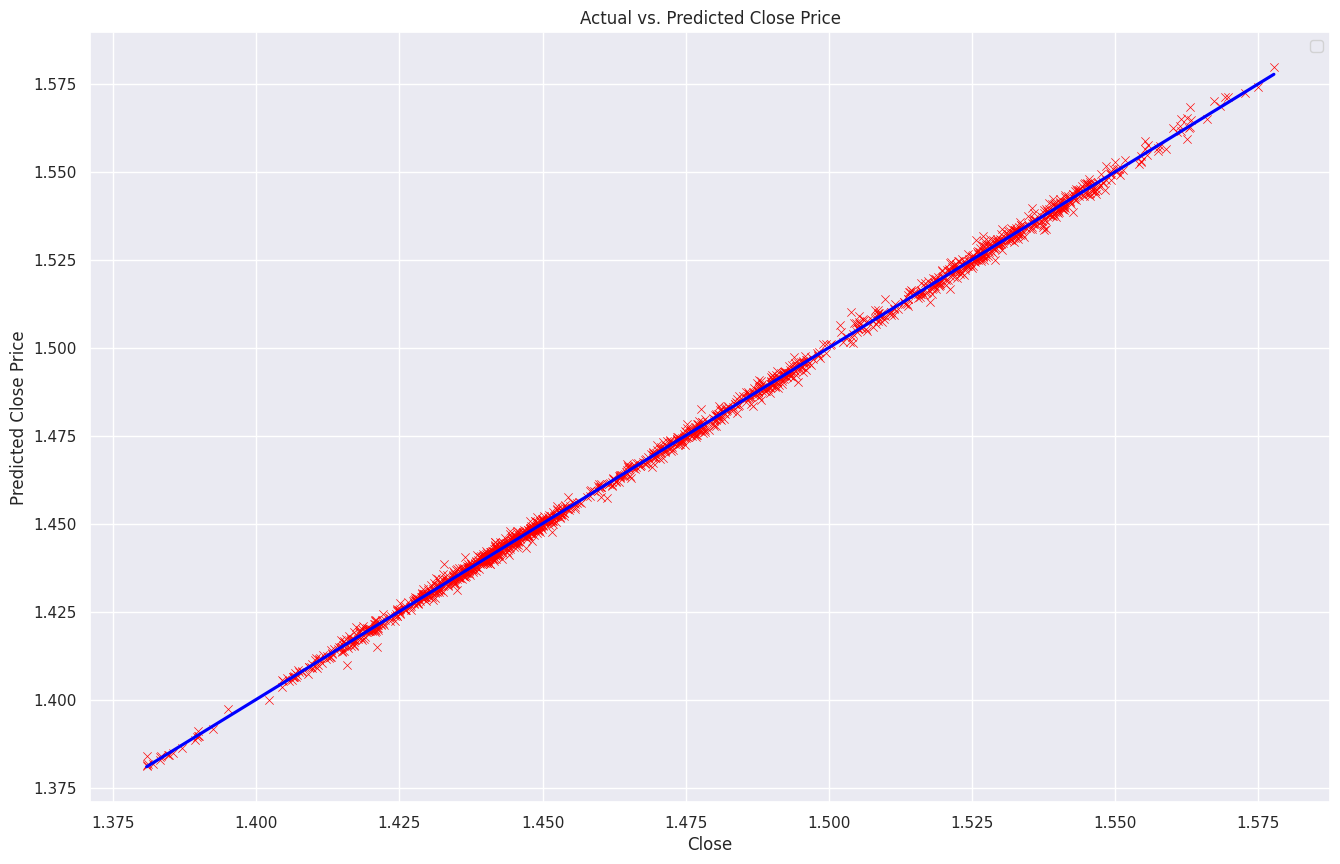

In [318]:

predicted_close = reg.predict(df[['Open', 'High', 'Low']])

plt.figure(figsize=(16, 10))
sns.scatterplot(x=df['Close'], y=predicted_close, color='red', marker = 'x')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')

ourprediction = reg.predict([[1.6,1.7,1.5]])

sns.regplot(x=df['Close'], y=predicted_close, scatter=False, color='blue')


plt.legend()

plt.show()